<a href="https://colab.research.google.com/github/kaddalasiva/unsupervised-learning/blob/master/Copy_of_Customer_Segments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CUSTOMER SEGMENT DATA PROCESSING

## Goal - 

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.


The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

## PULLING THE DATASET LOCALLY

Download the [Wholesale customers data.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/) file in your file system.

Then upload the file below if using colab, else place the file in same path as this file in your file system.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Load the wholesale customers dataset
data = pd.read_csv("Wholesale customers data.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))

Wholesale customers dataset has 440 samples with 6 features each.


# DATA EXPLORATION

In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code cell below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'. Consider what each category represents in terms of products you could purchase.

In [5]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## IMPLEMENTATION : -  SELECTING SAMPLES

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
#Select three indices of your choice you wish to sample from the dataset
indices = [1,2,3]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


## ACTIVITY 

In the above code cell select any different indices of your choice and run the entire operations in the notebook to see different outcomes.

## VISUALIZATION

Text(0.5,1,'Percentile Scores')

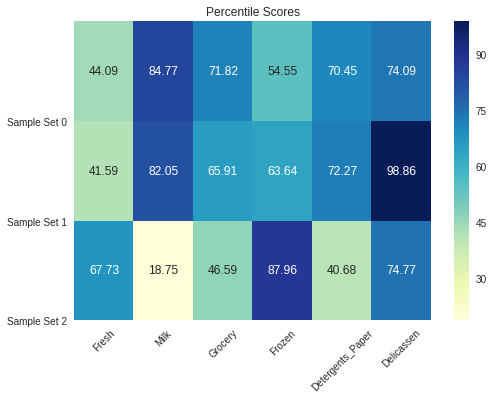

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap((data.rank(axis=0, pct=True).iloc[indices].round(decimals=5))*100.00,annot=True,fmt='.2f',cmap='YlGnBu')
plt.yticks([2.,1.,.0], ['Sample Set ' + str(i) for i in range(0,3)], rotation=360)
plt.xticks(rotation=45, ha='center')
plt.title('Percentile Scores')

## QUESTION - 1

Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.

What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint**: 

Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying "McDonalds" when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8
* Frozen: 3071.931818


Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be?

## Answer - 

Provide your answer to the above question

## FEATURE RELEVANCE

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? 

We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we implement the following:

* Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.
* Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets.
* Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.
* Import a decision tree regressor, set a random_state, and fit the learner to the training data.
* Report the prediction score of the testing set using the regressor's score function.

In [8]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


new_data = data.drop('Detergents_Paper',axis=1)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25, random_state=0)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print(score)

0.7286551812541454


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## ACTIVITY
In the above cell we have taken '**Detergents_Paper**' as the sample feature to determine the performance of the model when it is removed.

Similarly identify the model's performance by dropping different features.

and submit your github link to us.

## QUESTION - 2

1. Which feature did you attempt to predict?
2. What was the reported prediction score?
3. Is this feature necessary for identifying customers' spending habits?


**Hint:** The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.



## Answer - 

Provide your inferences for the three questions above.

## DATA PREPROCESSING

In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### FEATURE SCALING


If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a[ Box-Cox test](https://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.



In the code block below, you will need to implement the following:

* Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.
* Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


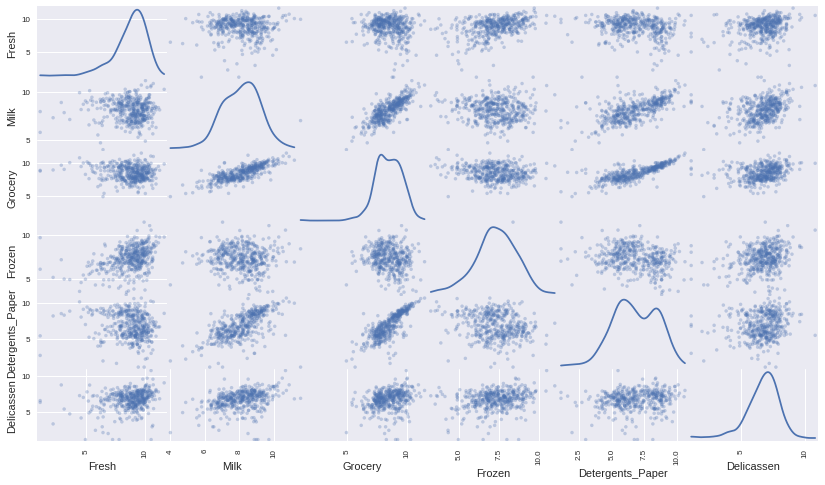

In [9]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation

After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
print(log_samples)

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  8.861775  9.191158  9.166179  7.474205          8.099554    7.482119
1  8.756682  9.083416  8.946896  7.785305          8.165079    8.967504
2  9.492884  7.086738  8.347827  8.764678          6.228511    7.488853


### Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.



In the code block below, we will implement the following:

* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.
* Optionally remove data points from the dataset by adding indices to the outliers list.



**NOTE:** 

If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [11]:
import itertools

outliers_lst  = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))

print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print('Original shape of data:\n', data.shape)
    
# Processed Data
print('New shape of data:\n', good_data.shape)

Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


## Question - 3

1. Are there any data points considered outliers for more than one feature based on the definition above?
2. Should these data points be removed from the dataset?
3. If any data points were added to the outliers list to be removed, explain why.


**Hint:** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.



## Answer - 

Provide your answers for the questions above.

## FEATURE TRANSFORMATION 

In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

## PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.




In the code block below, we implement the following:

* Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
* Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

In [0]:
## function for displaying the pca results
def pca_result(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)

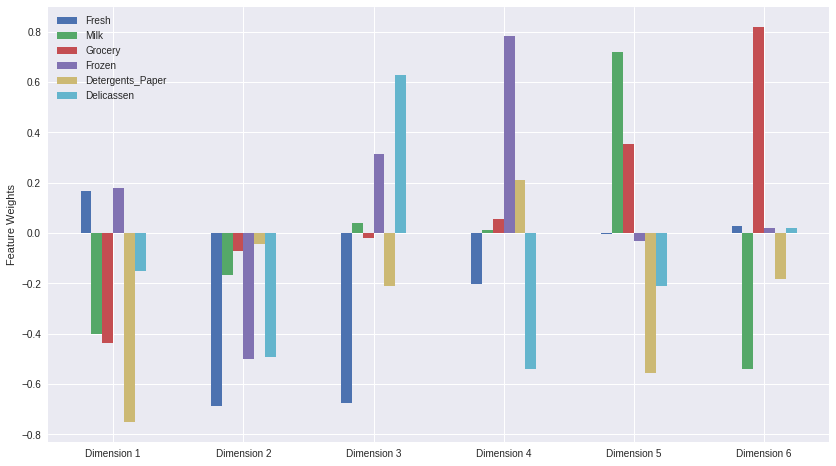

In [13]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = pca_result(good_data, pca)

## QUESTION - 4

* How much variance in the data is explained in total by the first and second principal component?
* How much variance in the data is explained by the first four principal components?
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights.



## Answer

Provide your answers for the questions above

## DIMENSIONALITY REDUCTION

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we implement the following:

* Assign the results of fitting PCA in two dimensions with good_data to pca.
* Apply a PCA transformation of good_data using pca.transform, and assign the results to reduced_data.
* Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

In [0]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

## Observation - 

Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,-1.8834,-1.5991
2,1.1553,-1.4052


## ACTIVITY

Read about [Biplot](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/biplot.princomp.html)

## CREATING CLUSTERS


For the given problem we will be working on [GAUSSIAN MIXTURE MODEL CLUSTERING ALGORITHM](https://scikit-learn.org/stable/modules/mixture.html)




Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. 

However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The [silhouette coefficient ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, we will implement the following:

* Fit a clustering algorithm to the reduced_data and assign it to clusterer.
* Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.
* Find the cluster centers using the algorithm's respective attribute and assign them to centers.
* Predict the cluster for each sample data point in pca_samples and assign them sample_preds.
* Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.
* Assign the silhouette score to score and print the result.

In [17]:
# Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print(score)

0.4219168464626149


## CLUSTER VISUALIZATION

In [0]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

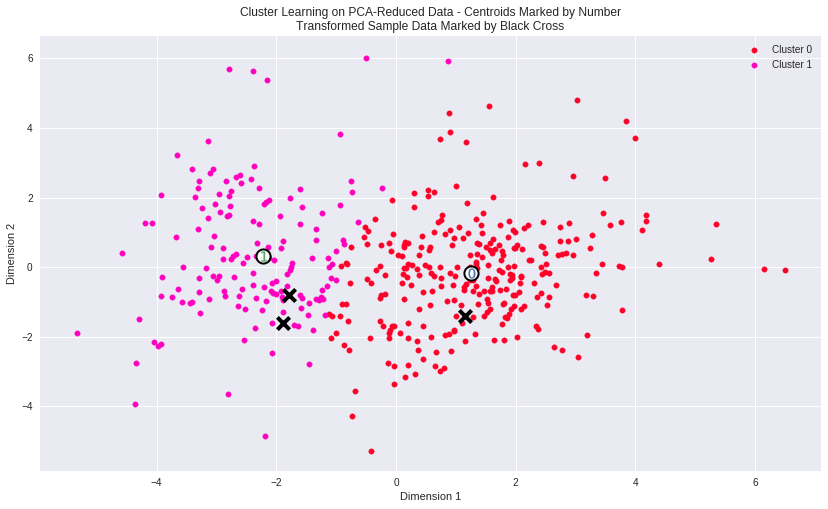

In [19]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

## Conclusion


In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the customer segments, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which segment that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the customer segments to a hidden variable present in the data, to see whether the clustering identified certain relationships.

## Question - 5
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively.

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?


**Hint**: Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

## Answer 

Provide your answers for the question specified above.